In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gseapy as gp
from tqdm import tqdm
from adjustText import adjust_text
import seaborn as sns
import anndata

In [2]:
adata = sc.read_h5ad('../../MERFISH/Baysor/ABC_cleaned.h5ad')

#wanting to make sure we only show the neurons with a high confidence
adata_HQ = adata[adata.obs.subclass_label_confidence > 0.8]

adata_HQ.X = adata_HQ.layers['counts'].toarray().copy()
sc.pp.normalize_total(adata_HQ)
sc.pp.log1p(adata_HQ)

/home/doug.henze/.conda/envs/Vizgen_2/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/doug.henze/.conda/envs/Vizgen_2/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


/tmp/ipykernel_821847/1454712226.py:5: ImplicitModificationWarning: Trying to modify attribute `.obsm` of view, initializing view as actual.
  testing_24.obsm['spatial'][:,0] += 2500


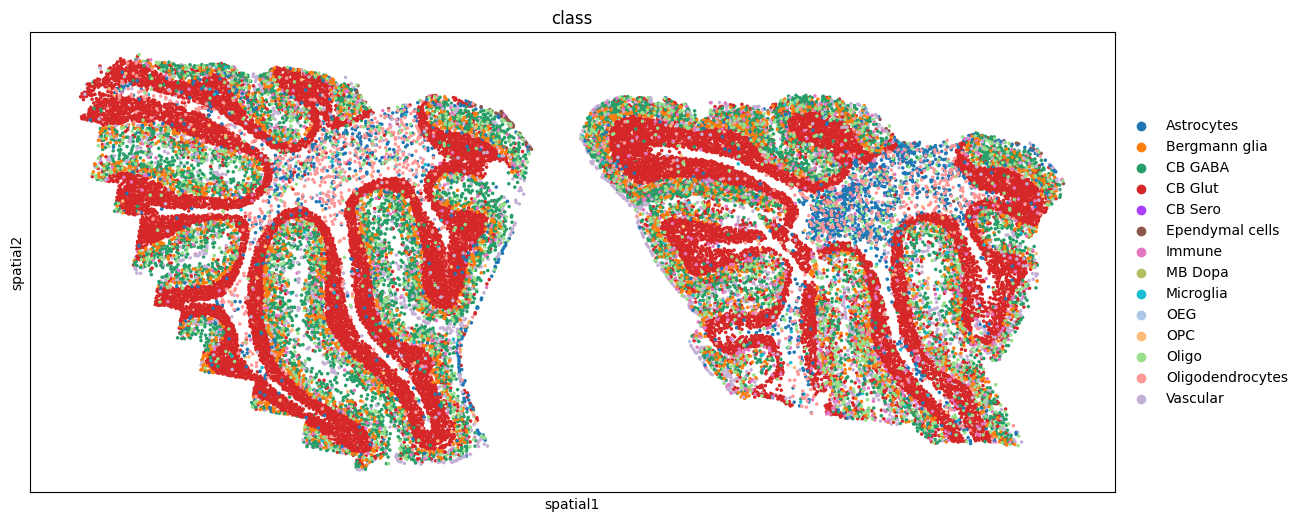

In [3]:
# pick two brains with good looking Cerebellums
testing_3 = adata_HQ[(adata_HQ.obs.batchID == '3-mo-female-3') & (adata_HQ.obs.Brain_Region == 'Cerebellum')]
testing_24 = adata_HQ[(adata_HQ.obs.batchID == '24-mo-female-5') & (adata_HQ.obs.Brain_Region == 'Cerebellum')]

testing_24.obsm['spatial'][:,0] += 2500

ad_visual = anndata.concat([testing_3,testing_24])

# plot the two brains next to eachother.
fig, ax = plt.subplots(figsize=(14,14))
sc.pl.spatial(ad_visual,color='class',spot_size=25,ax=ax,save='3m_left_24m_right_cerebelli.pdf')

/tmp/ipykernel_821847/3586929070.py:6: ImplicitModificationWarning: Trying to modify attribute `.obsm` of view, initializing view as actual.
  testing_24.obsm['spatial'][:,0] += 2500


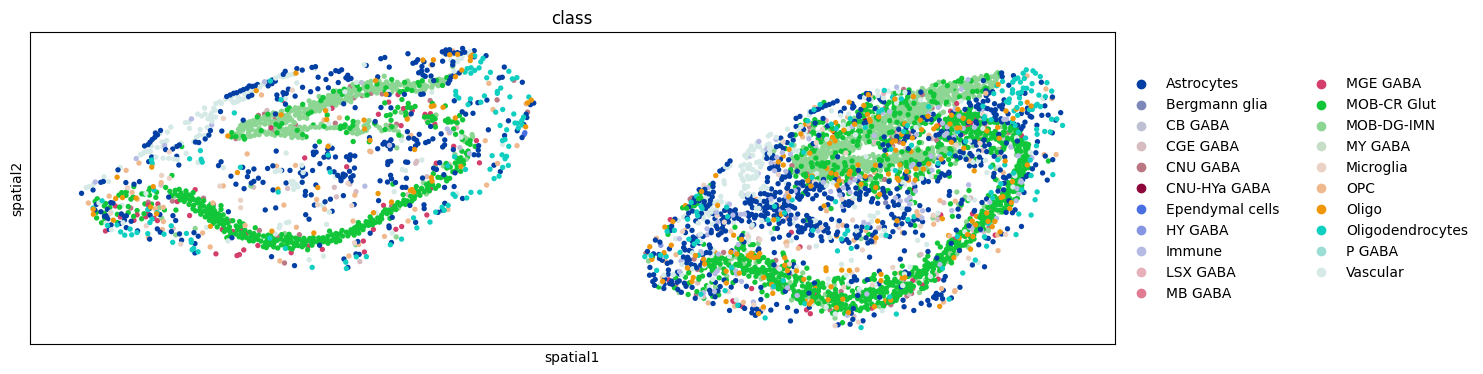

In [4]:
# Just repeat the process with the Hippocampi in brains that look the best.

testing_3 = adata_HQ[(adata_HQ.obs.batchID == '3-mo-female-1-rev2') & (adata_HQ.obs.Brain_Region == 'Hippocampus')]
testing_24 = adata_HQ[(adata_HQ.obs.batchID == '24-mo-female-3') & (adata_HQ.obs.Brain_Region == 'Hippocampus')]

testing_24.obsm['spatial'][:,0] += 2500

ad_visual = anndata.concat([testing_3,testing_24])

fig, ax = plt.subplots(figsize=(14,14))
sc.pl.spatial(ad_visual,color='class',spot_size=25,ax=ax,save='3m_left_24m_right_hippocampi.pdf')

In [5]:
#